In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Data Preprocessing

In [70]:
raw_df = pd.read_csv('../data/vehicle_raw.csv')

### Drop Unnecessary Column

In [71]:
# remove model column (312 unique values are too much + unnecessary)
data = raw_df.drop(['Model'], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Drop Rows with Null

In [72]:
# sum of null values => in percentage
(data.isnull().sum() / len(data)) * 100 

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [73]:
# lower than 5% => we'll just drop those rows
data.dropna(axis=0, inplace=True)

### Remove Price Outlier

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

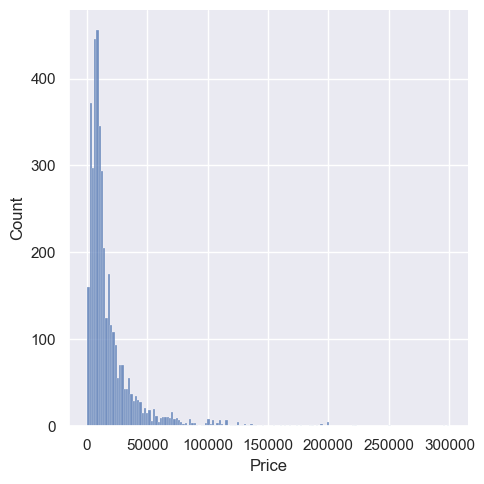

In [75]:
# Focus on Price, EngineV, Mileage bc they're numbers => examin PDFs
sns.displot(data['Price'])
data['Price'].describe()


103999.0

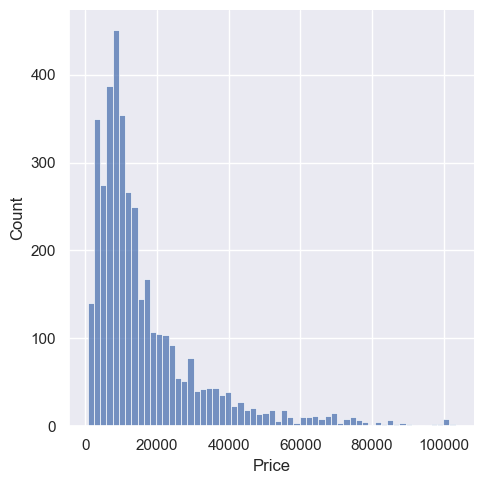

In [76]:
top98 = data['Price'].quantile(0.98)
display(top98)

data_rm_outlier_price = data[data['Price'] < top98]
sns.displot(data_rm_outlier_price['Price'])

### Remove Mileage Outlier

count    3943.000000
mean      166.739538
std       102.042365
min         0.000000
25%        95.000000
50%       160.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

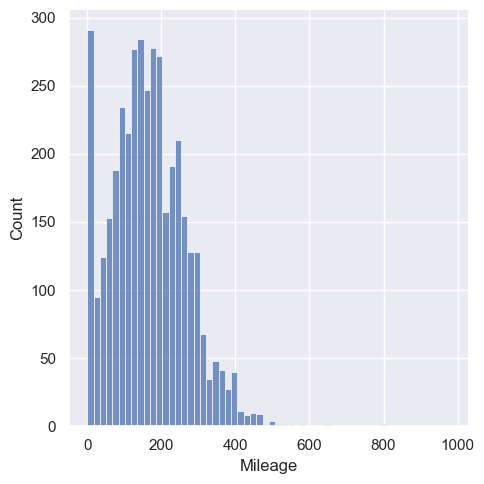

In [78]:
sns.displot(data_rm_outlier_price['Mileage'])
data_rm_outlier_price['Mileage'].describe()

436.7399999999998

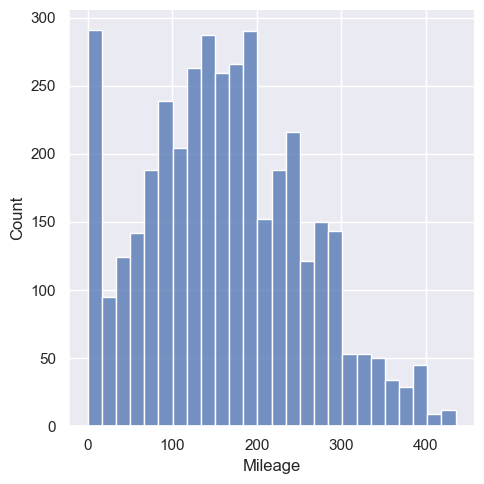

In [83]:
top99 = data_rm_outlier_price['Mileage'].quantile(0.99)
display(top99)

data_rm_outlier_mileage = data_rm_outlier_price[data_rm_outlier_price['Mileage'] < top99]
sns.displot(data_rm_outlier_mileage['Mileage'])

### Remove Enginge Volume Outlier

count    3903.000000
mean        2.742242
std         5.005715
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

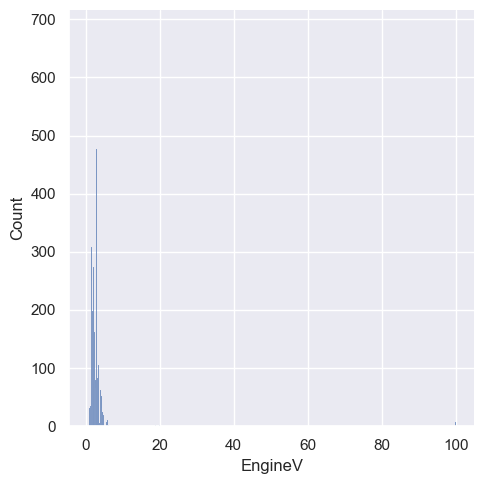

In [84]:
sns.displot(data_rm_outlier_mileage['EngineV'])
data_rm_outlier_mileage['EngineV'].describe()

In [90]:
top99 = data_rm_outlier_mileage['EngineV'].quantile(0.99)
display(top99)

6.0